<a target="_blank" href="https://colab.research.google.com/github/SystemInternal/SystemCookbook/blob/master/system_api/basic_example.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Start by installing System API's Python SDK

In [116]:
# !pip install --upgrade pip
# !pip install soh-service-client==1.48.0 --extra-index-url https://pypi.fury.io/systeminc/
# !pip install pandas
# !pip install networkx
# !pip install matplotlib
!python3 -m pip install -U --no-cache-dir  \
            --config-settings="--global-option=build_ext" \
            --config-settings="--global-option=-I$(brew --prefix graphviz)/include/" \
            --config-settings="--global-option=-L$(brew --prefix graphviz)/lib/" \
            pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.13-cp310-cp310-macosx_13_0_arm64.whl size=92185 sha256=490f520039e0eecc101cdce80cadf42c89816fd6e8c4f142e72c871ecebeca85
  Stored in directory: /private/var/folders/lt/3hdjvfm900dg0hh7t4p7g1n00000gn/T/pip-ephem-wheel-cache-a58hh3zf/wheels/c5/96/10/6c25add1fffc368b1927252bf73b63fcb938de8f4486e23691
Successfully built pygraphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [35]:
import soh_service_client
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
import matplotlib.image as mpimg


In [14]:
system_client = soh_service_client.ApiClient()
topic_api = soh_service_client.api.topics_api.TopicsApi()
findings_api = soh_service_client.api.findings_api.FindingsApi()
StatRelationshipsApi = soh_service_client.api.StatisticalRelationshipsApi()
MechRelationshipsApi = soh_service_client.api.MechanisticRelationshipsApi()

In [ ]:
import soh_service_client.models




In [38]:

fetched_topics = topic_api.fetch_topics_topics_get("malaria")
topics_json = [json.loads(topic.json()) for topic in fetched_topics]
df = pd.DataFrame(topics_json)
df

,name,topic_id,umls_cuis,umls_children,wikidata_id,roles,category,mechanistic_category,relationship_types
0,malaria,7xpZryeSKE,[C0024530],[],Q12156,"[Determinant, Outcome, Agent]",Biomedical - Diseases & disorders,diseases & disorders,"[statistical, mechanistic]"
1,malaria prevalence,wYL8n9x4mu,[],[],Q113361605,"[Determinant, Outcome]",Biomedical - Diseases & disorders,None,[statistical]
2,malaria vaccine,vtzCBL9BRr,[C0206255],[],Q6741353,[Intervention],Preventative,None,[statistical]
3,avian malaria,ug1mEfyCUG,[C0024533],[],Q2663527,"[Determinant, Outcome]",Biomedical - Diseases & disorders,None,[statistical]
4,cerebral malaria,gjXBGUnKoK,[C0024534],[],Q2822915,"[Determinant, Outcome, Agent]",Biomedical - Diseases & disorders,diseases & disorders,"[statistical, mechanistic]"
5,Plasmodium falciparum malaria,n8o7PdNYDI,[C0024535],[],Q18554672,"[Determinant, Outcome, Agent]",Biomedical - Diseases & disorders,diseases & disorders,"[statistical, mechanistic]"
6,plasmodium vivax malaria,gdUTojmkBD,[C0024537],[],Q18554412,"[Determinant, Outcome]",Biomedical - Diseases & disorders,None,"[statistical, mechanistic]"
7,plasmodium malariae,GuVqtviR9c,[C0032153],[],Q133969,"[Determinant, Outcome]",Biomedical - Diseases & disorders,None,[statistical]


In [185]:
def pprint_finding(f):
    print(f"{f.variable_1_name} - ({f.statistic_type}: {f.statistic_value}) -> {f.variable_2_name}")

def pprint_topic(t):
    print(f"{t.name} ({t.topic_id})")

def draw_graph(paths):
    links = paths.links
    node_name_lookup = {node.topic_id: node.name for node in paths.nodes}
    source_nodes = [node_name_lookup.get(link.source, link.source) for link in links]
    target_nodes = [node_name_lookup.get(link.target, link.target) for link in links]
    edges = [(source_nodes[i], target_nodes[i]) for i in range(len(source_nodes))]
    edge_value = [round(link.median_effect_size, 2) for link in links if link.median_effect_size is not None]
    nodes = source_nodes + target_nodes
    G = nx.DiGraph()
    for node in nodes:
        G.add_node(node)
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge_value[edges.index(edge)])

    pos = nx.nx_agraph.graphviz_layout(G, prog="dot", args='-Grankdir=LR')
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", font_color="black", edge_color="gray", width=2, alpha=0.5)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()


In [53]:
res = findings_api.fetch_findings_findings_log_get("10.1016/j.trstmh.2008.11.016")
res.study.title
for f in res.findings:
    pprint_finding(f)

household wealth - (odds_ratio: 0.79) -> malaria prevalence
living at higher altitude - (odds_ratio: 0.95) -> malaria prevalence
number of long-lasting insecticidal nets (LLINs) per household - (odds_ratio: 0.6) -> malaria prevalence
peak monthly rainfall in the year before the survey - (odds_ratio: 1.1) -> malaria prevalence


In [77]:
topic_id = "7xpZryeSKE"
gp=soh_service_client.models.GraphPayload()
StatRelationshipsApi = soh_service_client.api.StatisticalRelationshipsApi()
res = StatRelationshipsApi.fetch_full_graph_stat_relationships_topic_id_graph_post(topic_id, gp)
connected_nodes = res.nodes

In [85]:
for role in soh_service_client.models.Role:
    node_type = [node for node in connected_nodes if role in node.roles]
    print(f"Number of {role.value}: {len(node_type)}")

Number of Determinant: 103
Number of Intervention: 20
Number of Outcome: 100
Number of Agent: 58


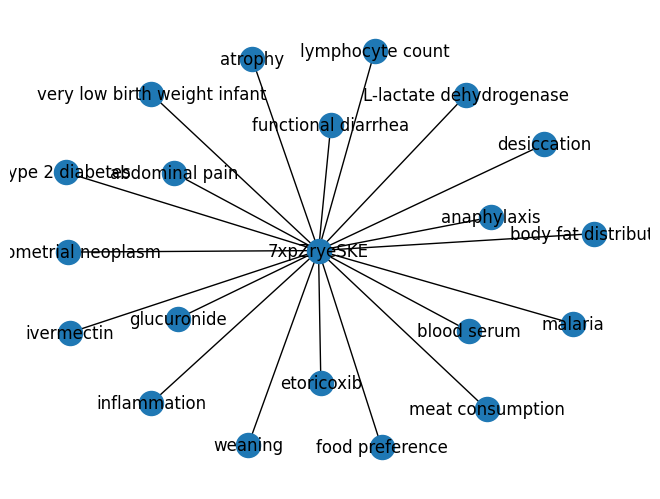

In [71]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_node(topic_id)
for node in connected_nodes:
    G.add_node(node.name)
for node in connected_nodes:
    G.add_edge(topic_id, node.name)
nx.draw(G, with_labels=True)
plt.show()

Malaria node: malaria(7xpZryeSKE)
Temperature node: temperature(4FaXcuNJRt)


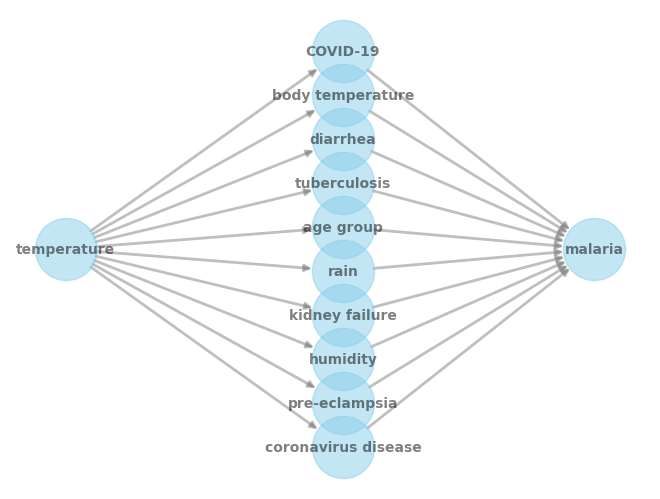

In [155]:
# Mediator between temperature and malaria
malaria_node = topic_api.fetch_topics_topics_get("malaria")[0]
temperature_node = topic_api.fetch_topics_topics_get("temperature")[0]
print(f"Malaria node: {malaria_node.name}({malaria_node.topic_id})")
print(f"Temperature node: {temperature_node.name}({temperature_node.topic_id})")
pathsPayload = soh_service_client.models.PathsPayload(n_hop=2)
paths = StatRelationshipsApi.fetch_stat_mediators_stat_relationships_topic_id_paths_mediators_post(
    topic_id=temperature_node.topic_id,
    target_topic_id=malaria_node.topic_id,
    paths_payload=pathsPayload
    )
draw_graph(paths)

In [107]:
[r.value for r in soh_service_client.models.Role]

['Determinant', 'Intervention', 'Outcome', 'Agent']

In [106]:
potential_mediators = [n for n in paths.nodes if ("Determinant" in n.roles) and n.topic_id != temperature_node.topic_id and n.topic_id != malaria_node.topic_id]
print("Potential mediators:")
for mediator in potential_mediators:
    pprint_topic(mediator)

Potential mediators:
COVID-19 (DZBybMvxDI)
body temperature (CPu3fKZt34)
diarrhea (UvVKf6zUx4)
tuberculosis (EPkRQaRIuw)
age group (HejFSI-X_z)
rain (MtUI-7H2Qe)
kidney failure (vddSqawvyH)
humidity (UBLYDhO7ul)
pre-eclampsia (czkItWDyBr)
coronavirus disease (-h7kqMbjsY)


In [182]:
pathsPayload = soh_service_client.models.PathsPayload(n_hop=2)
paths = StatRelationshipsApi.fetch_stat_paths_stat_relationships_topic_id_paths_traversal_direction_post(
    topic_id=topic_id,
    traversal_direction="upstream",
    paths_payload=pathsPayload)
draw_graph(paths)

TypeError: type NoneType doesn't define __round__ method

In [165]:
paths.links

[TopicEdge(id='qODaxGmiJk|7xpZryeSKE', source='qODaxGmiJk', target='7xpZryeSKE', num_findings=92, median_effect_size=0.4363306397731122, meta=None),
 TopicEdge(id='W3DRcIxD47|7xpZryeSKE', source='W3DRcIxD47', target='7xpZryeSKE', num_findings=57, median_effect_size=0.39828910483854024, meta=None),
 TopicEdge(id='HejFSI-X_z|7xpZryeSKE', source='HejFSI-X_z', target='7xpZryeSKE', num_findings=52, median_effect_size=0.6020088671595277, meta=None),
 TopicEdge(id='3bsZWIMWFp|7xpZryeSKE', source='3bsZWIMWFp', target='7xpZryeSKE', num_findings=48, median_effect_size=0.5476084028894961, meta=None),
 TopicEdge(id='wWbfsY5E0d|7xpZryeSKE', source='wWbfsY5E0d', target='7xpZryeSKE', num_findings=42, median_effect_size=0.5007491887397124, meta=None),
 TopicEdge(id='MtUI-7H2Qe|7xpZryeSKE', source='MtUI-7H2Qe', target='7xpZryeSKE', num_findings=29, median_effect_size=0.8705365852942798, meta=None),
 TopicEdge(id='4FaXcuNJRt|7xpZryeSKE', source='4FaXcuNJRt', target='7xpZryeSKE', num_findings=27, median_

In [168]:
edge_value = [link.median_effect_size for link in paths.links]

In [169]:
edge_value

[0.4363306397731122,
 0.39828910483854024,
 0.6020088671595277,
 0.5476084028894961,
 0.5007491887397124,
 0.8705365852942798,
 0.43469932557681495,
 0.5029678190794714,
 0.5784861744013028,
 0.353872594085611]